# Twitter Classifier

### - Viral **VS** Non-Viral Tweets

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [46]:
all_tweets = pd.read_json("random_tweets.json", lines=True)

#print(len(all_tweets))
#print(all_tweets.columns)
#print(all_tweets['retweet_count'])

Importing the necessary libraries. Reading the data into a dataframe. Having a bit of a look at the dataframe.

In [47]:
median_retweets = all_tweets['retweet_count'].median()
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median_retweets, 1, 0)

Finding the median number of retweets to use as a benchmark for viral tweets. A separate column is declaring whether or not the tweet is viral. This will be used as our labels set soon.

In [48]:
print(all_tweets.is_viral)

0        0
1        0
2        0
3        1
4        0
        ..
11094    1
11095    1
11096    0
11097    0
11098    0
Name: is_viral, Length: 11099, dtype: int64


Just having a look to see if there were any problems with the conversion.

In [49]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)

Adding a column that highlights the number of characters in each tweet.

In [50]:
print(all_tweets.tweet_length)

0        140
1         77
2        140
3        140
4        140
        ... 
11094    140
11095     75
11096    140
11097    140
11098     75
Name: tweet_length, Length: 11099, dtype: int64


Seeing if there were any problems with adding the tweet character column.

In [51]:
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'] , axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)
all_tweets['hashtag_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('#') , axis=1)

Doing the same as tweet length but with followers, friends, and number of hashtags.

In [52]:
print(all_tweets.followers_count)
print(all_tweets.friends_count)

0         215
1         199
2         196
3        3313
4         125
         ... 
11094     509
11095     462
11096     135
11097      59
11098    1563
Name: followers_count, Length: 11099, dtype: int64
0         335
1         203
2         558
3        2272
4         273
         ... 
11094    1323
11095    1033
11096      90
11097     320
11098    1697
Name: friends_count, Length: 11099, dtype: int64


Verifying that there were no problems with adding the new columns.

In [53]:
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length', 'followers_count', 'friends_count', 'hashtag_count']]

Adding labels to be whether or not a tweet was viral. The data markers based on the length of the tweet, number of followers, number of friends, number of hashtags.

In [54]:
scaled_data = scale(data, axis = 0)
print(scaled_data)

[[ 0.6164054  -0.02878298 -0.14483305 -0.32045057]
 [-1.64577622 -0.02886246 -0.16209787 -0.32045057]
 [ 0.6164054  -0.02887736 -0.11566596 -0.32045057]
 ...
 [ 0.6164054  -0.02918038 -0.1768776  -0.32045057]
 [ 0.6164054  -0.02955792 -0.14679496 -0.32045057]
 [-1.71759151 -0.02208668  0.0333085  -0.32045057]]


Scales the testing data, this is necessary due to the fact that 3 hashtags are more rare/valuable than 3 followers. They need to be normalised so they are on a scale of similar importances.

In [55]:
train_data, testing_data, training_labels, testing_labels = train_test_split(data, labels, test_size = 0.2, random_state = 1)

data is split into data that trains the model and data that tests the model.

In [56]:
scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, training_labels)
    scores.append(classifier.score(testing_data, testing_labels))

Sets the classifier with n_neighbors equal to the iteration it is on. Fits the data using the training data and labels found previously. Adds the calculated efficiency to the scores list.
Continues for the number of iterations.

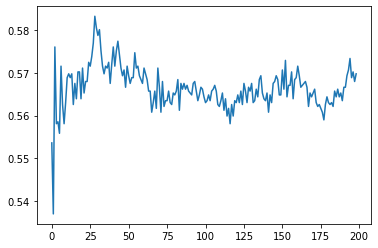

0.5833333333333334

In [57]:
plt.plot(scores)
plt.show()

scores.index(max(scores))
scores[28]

Plots the scores which contain the efficiency of the model. 
Finds the index of the max socre.
Prints the number which makes the score max.